In [1]:
##Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Question 1 - a:
#### Examine the data initially to identify duplicates, missing values, irrelevant entries, or outliers. Check for any instances of erroneous entries and rectify them as needed
### Question 2:
#### Refine the data for further processing based on your findings

In [2]:
data_songs = pd.read_csv(r"E:\Rahul_25\Docs_25\SIMPLILEARN AIML\MACHINE LEARNING USING PYTHON\Projects\creating_cohorts_of_songs\rolling_stones_spotify.csv")
data_songs.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [3]:
data_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [4]:
##From the above data, columns such as id and uri are irrelevent to the classification, hence we drop those both columns

In [5]:
data_songs.drop(columns = ['id', 'uri'], inplace = True)
data_songs.head()

,Unnamed: 0,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [6]:
#Changing the datatype of the release date 

In [7]:
data_songs['release_date'] = pd.to_datetime(data_songs['release_date'])

In [8]:
data_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        1610 non-null   int64         
 1   name              1610 non-null   object        
 2   album             1610 non-null   object        
 3   release_date      1610 non-null   datetime64[ns]
 4   track_number      1610 non-null   int64         
 5   acousticness      1610 non-null   float64       
 6   danceability      1610 non-null   float64       
 7   energy            1610 non-null   float64       
 8   instrumentalness  1610 non-null   float64       
 9   liveness          1610 non-null   float64       
 10  loudness          1610 non-null   float64       
 11  speechiness       1610 non-null   float64       
 12  tempo             1610 non-null   float64       
 13  valence           1610 non-null   float64       
 14  popularity        1610 n

In [9]:
data_songs.shape

(1610, 16)

In [10]:
#Checking for null values in the given data

In [11]:
data_songs.isna().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [12]:
#Therefore no null values are present

In [13]:
#Checking for duplicated values in the given data

In [14]:
data_songs.duplicated().sum()

np.int64(0)

In [15]:
#Therefore no dupliactes are present in the given data

In [16]:
#Columns that are phrone to outliers are acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, duration_ms

<Axes: ylabel='duration_ms'>

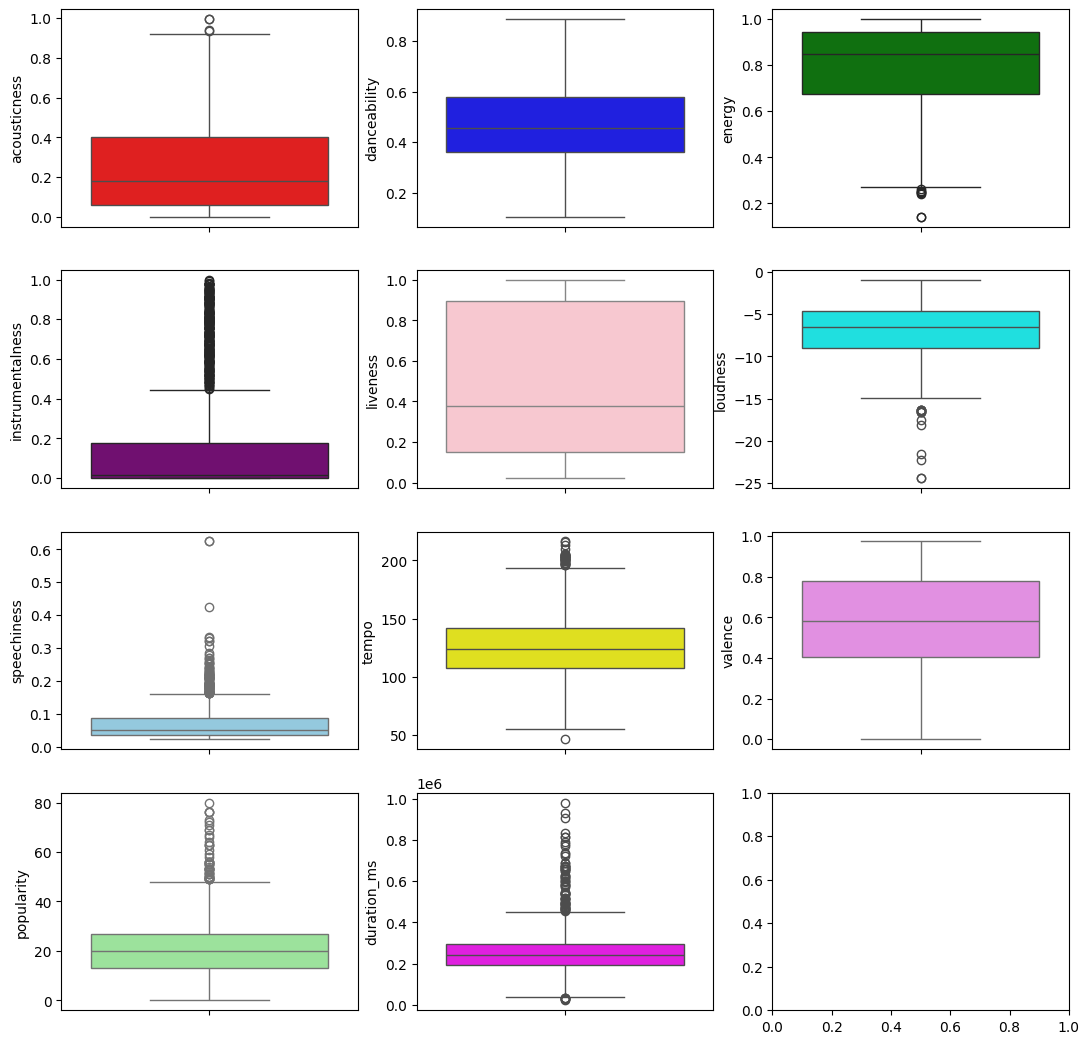

In [17]:
fig, axes = plt.subplots(4, 3,figsize = (13, 13))

sns.boxplot(data_songs['acousticness'], ax = axes[0][0], color = 'red')
sns.boxplot(data_songs['danceability'], ax = axes[0][1], color = 'blue')
sns.boxplot(data_songs['energy'], ax = axes[0][2], color = 'green')
sns.boxplot(data_songs['instrumentalness'], ax = axes[1][0], color = 'purple')
sns.boxplot(data_songs['liveness'], ax = axes[1][1], color = 'pink')
sns.boxplot(data_songs['loudness'], ax = axes[1][2], color = 'cyan')
sns.boxplot(data_songs['speechiness'], ax = axes[2][0], color = 'skyblue')
sns.boxplot(data_songs['tempo'], ax = axes[2][1], color = 'yellow')
sns.boxplot(data_songs['valence'], ax = axes[2][2], color = 'violet')
sns.boxplot(data_songs['popularity'], ax = axes[3][0], color = 'lightgreen')
sns.boxplot(data_songs['duration_ms'], ax = axes[3][1], color = 'magenta')

In [18]:
##In a box plot the max value of the distribution is given by Q3 + 1.5*IQR and the minimum value is given by Q1 - 1.5*IQR
##Any points of the data that lie above the maximum and below the minimum are considered as outliers and are deleted from the dataset

In [19]:
##Before that we will check whether the given datapoints of each column are in the prescribed range or not using the .describe() function

In [20]:
data_songs.describe()

,Unnamed: 0,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,804.500000,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
min,0.000000,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,402.250000,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,804.500000,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,1206.750000,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,1609.000000,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000
std,464.911282,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920


In [21]:
## Hence clearly all the features are in the prescribed limit

In [22]:
##Coming to the outlier part

feature_set = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms']

for feature in feature_set:
    Q1 = data_songs[feature].quantile(0.25)
    Q3 = data_songs[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    data_songs = data_songs[(data_songs[feature] <= upper_bound) & (data_songs[feature] >= lower_bound)]
  

In [23]:
data_songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1121 entries, 1 to 1609
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        1121 non-null   int64         
 1   name              1121 non-null   object        
 2   album             1121 non-null   object        
 3   release_date      1121 non-null   datetime64[ns]
 4   track_number      1121 non-null   int64         
 5   acousticness      1121 non-null   float64       
 6   danceability      1121 non-null   float64       
 7   energy            1121 non-null   float64       
 8   instrumentalness  1121 non-null   float64       
 9   liveness          1121 non-null   float64       
 10  loudness          1121 non-null   float64       
 11  speechiness       1121 non-null   float64       
 12  tempo             1121 non-null   float64       
 13  valence           1121 non-null   float64       
 14  popularity        1121 non-nu

In [24]:
##Shape of the new dataset after removing the outliers 
data_songs.shape

(1121, 16)

In [25]:
##Checking for any new null values in the data after removing the outliers
data_songs.isna().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

### Question 3-a 
#### Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album

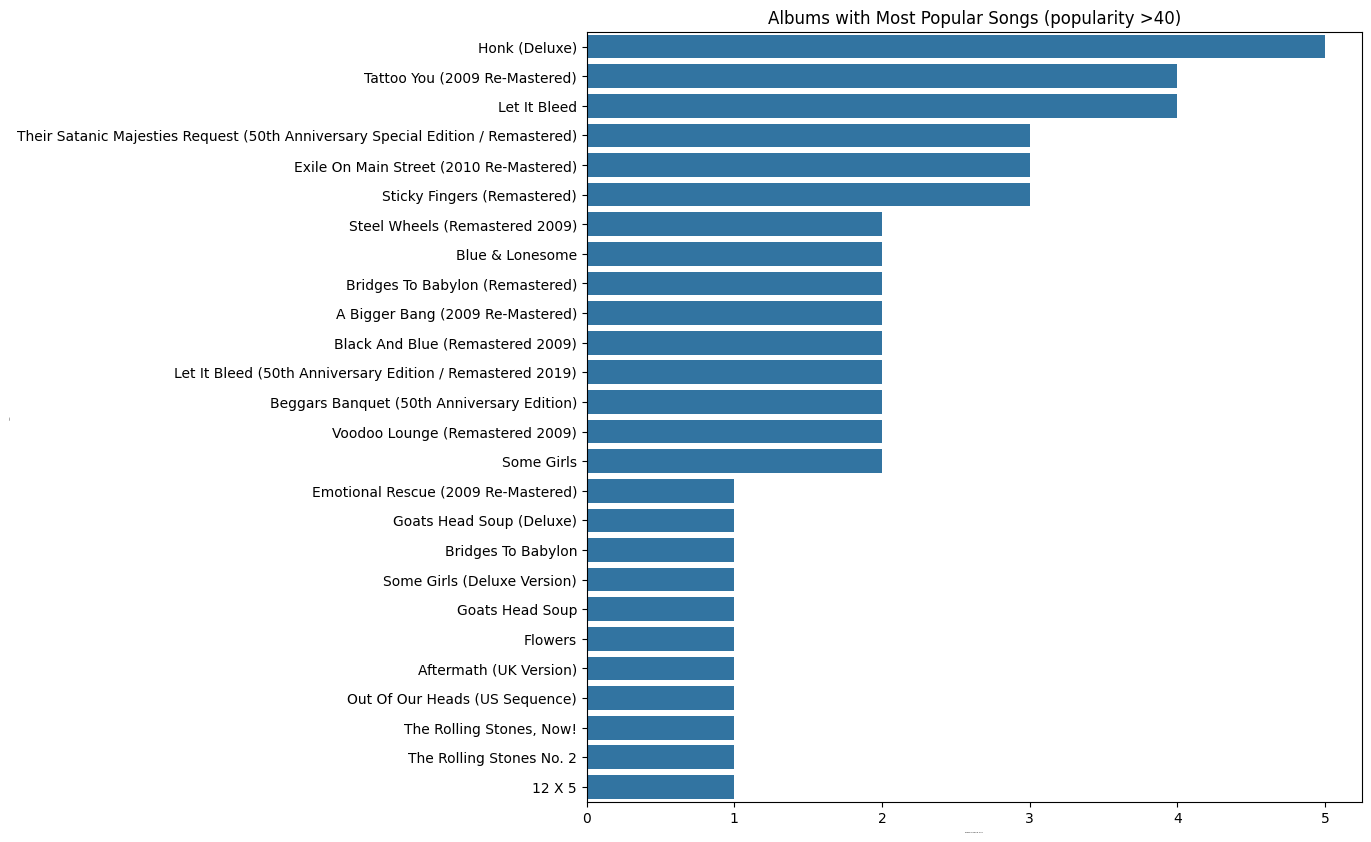

In [34]:
##Finding the most popular albums in the whole dataset
##Let us set a threshold for filtering out most popular albums and let it be 40
##The popularity threshlod to find the most popular albums is set to 40, as the 75th percentile of popularity is 27

plt.figure(figsize = (10,10))
top_albums = data_songs[data_songs['popularity'] >= 40]['album'].value_counts()
sns.barplot(x = top_albums.values , y = top_albums.index)
plt.title("Albums with Most Popular Songs (popularity >40)")
plt.xlabel("Number of Popular Songs", fontsize = 1)
plt.ylabel("Album", fontsize = 1)
plt.show()

### Question 3-a : ANSWER
#### The top albums are Honk(Delux), Tatoo you(Remastered), Let it bleed, their Satanic Majesties Request(50th Anniversary Special Edition / Remastered), Exile on main Street and Sticky Fingers
#### Hence the top 2 albums with the most number of popular songs that should be recommended to anyone are Honk(Delux) and Tatoo you(Remastered)

### Question 3-b
#### Conducting exploratory data analysis to delve into various features of songs, aiming to identify patterns


### Question 3-c
#### Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved


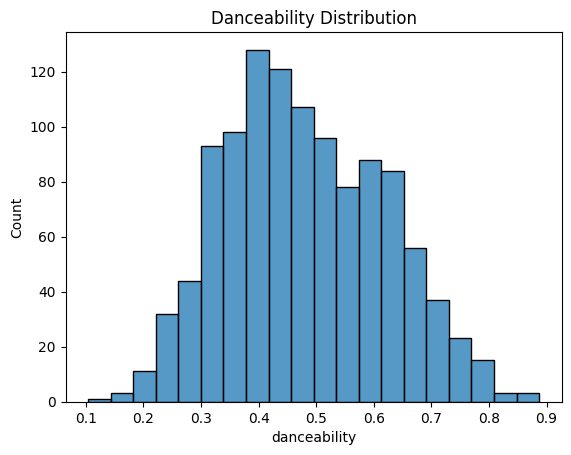

In [35]:
sns.histplot(data_songs['danceability'], bins=20)
plt.title('Danceability Distribution')
plt.show()

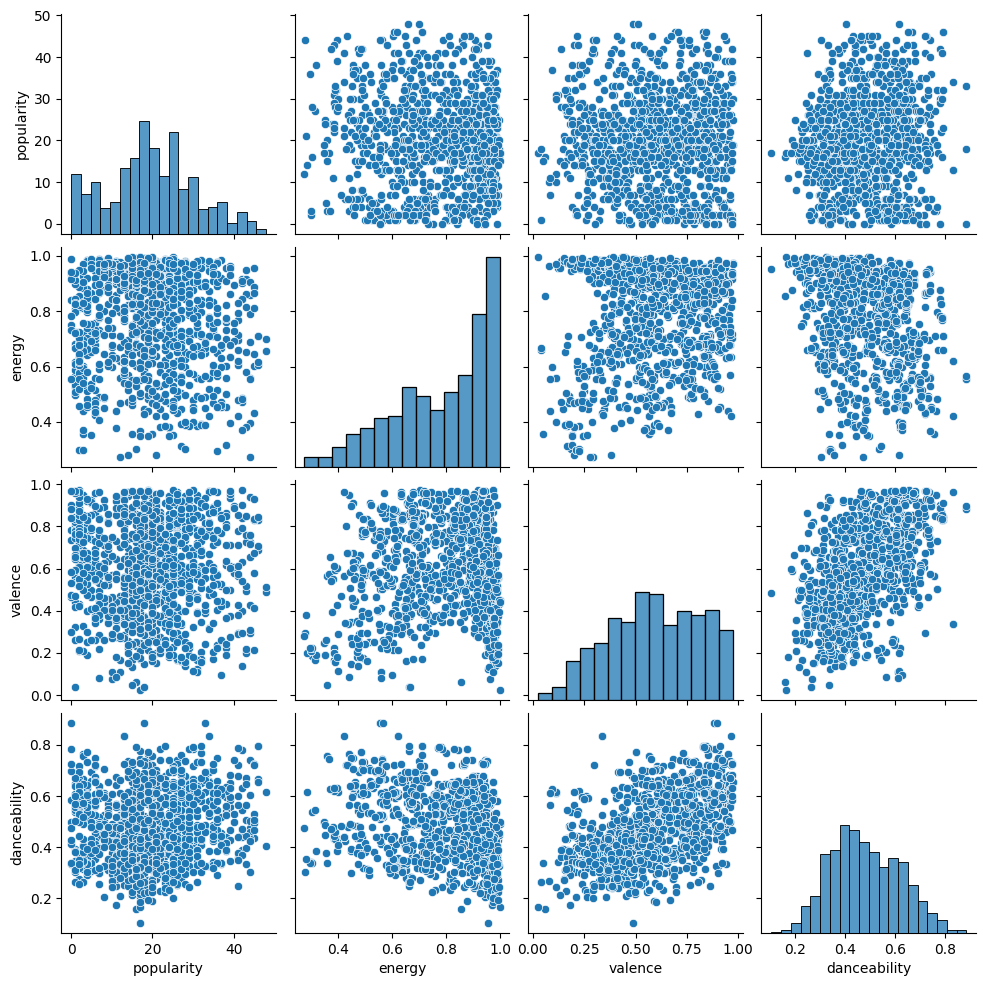

In [36]:
sns.pairplot(data_songs[['popularity', 'energy', 'valence', 'danceability']])
plt.show()

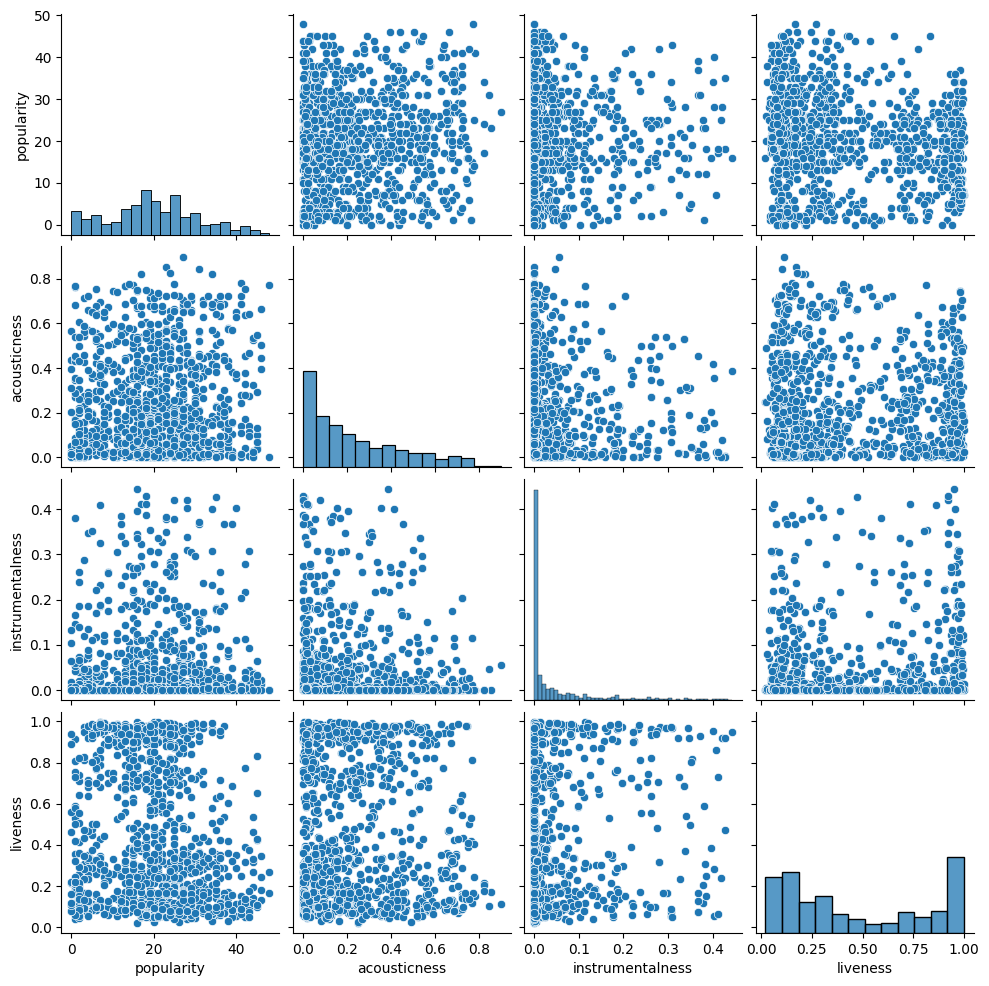

In [28]:
sns.pairplot(data_songs[['popularity', 'acousticness', 'instrumentalness', 'liveness']])
plt.show()

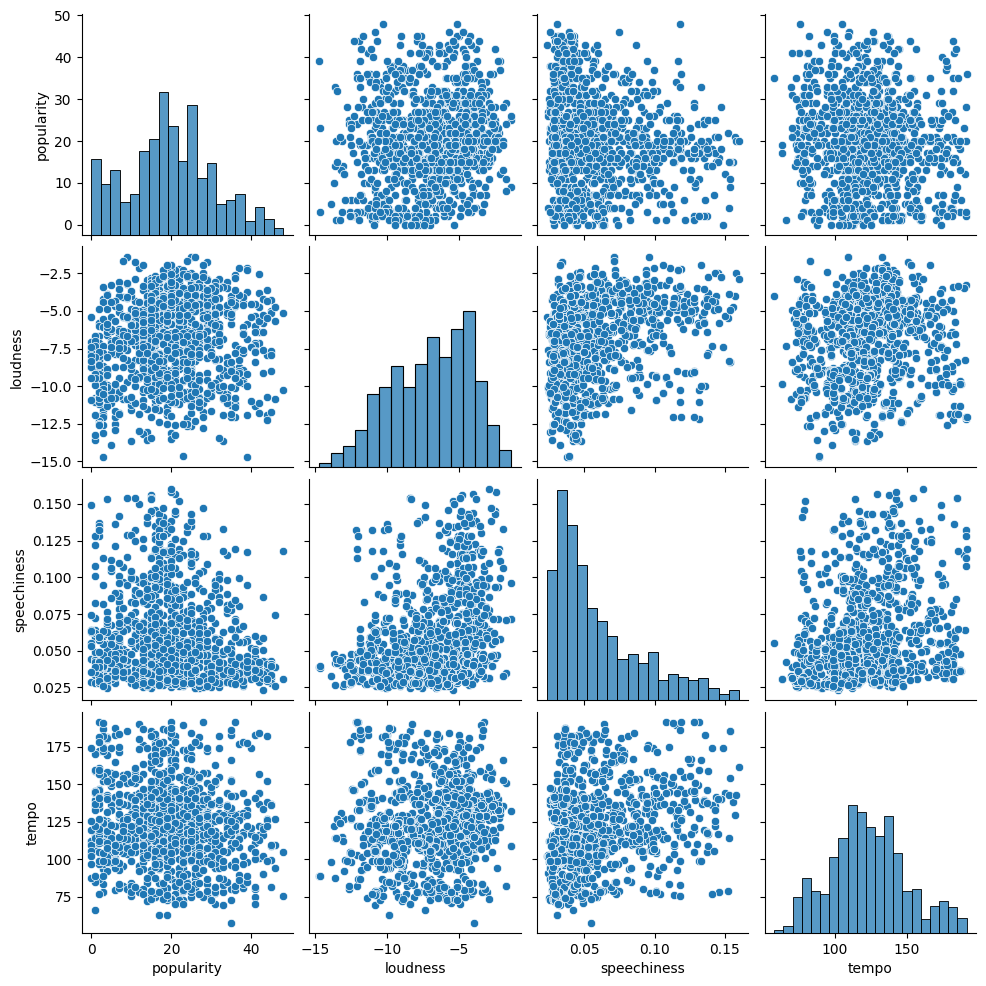

In [29]:
sns.pairplot(data_songs[['popularity', 'loudness', 'speechiness', 'tempo']])
plt.show()

## From the above pair-plots, plotted between popularity and all other features its observed as 
#### *No strong linear trends with popularity — scatterplots show weak or no obvious correlation.
#### *Valence vs. danceability shows a subtle positive relationship: happier songs might be a bit more danceable.
#### *Energy distribution is skewed — lots of high-energy tracks.

In [30]:
##Removing object datatype columns that are irrelevent to form a correlation matrix 
data_songs_for_corr = data_songs.drop(columns = ['Unnamed: 0', 'name', 'album', 'release_date', 'track_number'])

In [31]:
data_songs_for_corr.corr()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
acousticness,1.000000,0.102315,-0.411634,-0.091938,-0.105279,-0.246494,-0.151412,-0.166920,-0.138711,0.072927,0.089010
danceability,0.102315,1.000000,-0.289252,-0.057257,-0.497248,-0.289909,-0.309203,-0.250186,0.497328,0.090547,-0.246918
energy,-0.411634,-0.289252,1.000000,0.122536,0.493643,0.701407,0.509193,0.190953,0.118873,-0.055254,0.173393
instrumentalness,-0.091938,-0.057257,0.122536,1.000000,0.031046,0.086085,-0.028886,0.077216,0.091588,0.031758,-0.016856
liveness,-0.105279,-0.497248,0.493643,0.031046,1.000000,0.356324,0.433177,0.075052,-0.306395,-0.177704,0.306616
loudness,-0.246494,-0.289909,0.701407,0.086085,0.356324,1.000000,0.298645,0.062218,-0.070599,0.159139,0.280333
speechiness,-0.151412,-0.309203,0.509193,-0.028886,0.433177,0.298645,1.000000,0.213839,-0.310580,-0.139544,0.170174
tempo,-0.166920,-0.250186,0.190953,0.077216,0.075052,0.062218,0.213839,1.000000,0.052611,-0.082585,-0.081147
valence,-0.138711,0.497328,0.118873,0.091588,-0.306395,-0.070599,-0.310580,0.052611,1.000000,0.020164,-0.313259
popularity,0.072927,0.090547,-0.055254,0.031758,-0.177704,0.159139,-0.139544,-0.082585,0.020164,1.000000,0.132591


<Axes: >

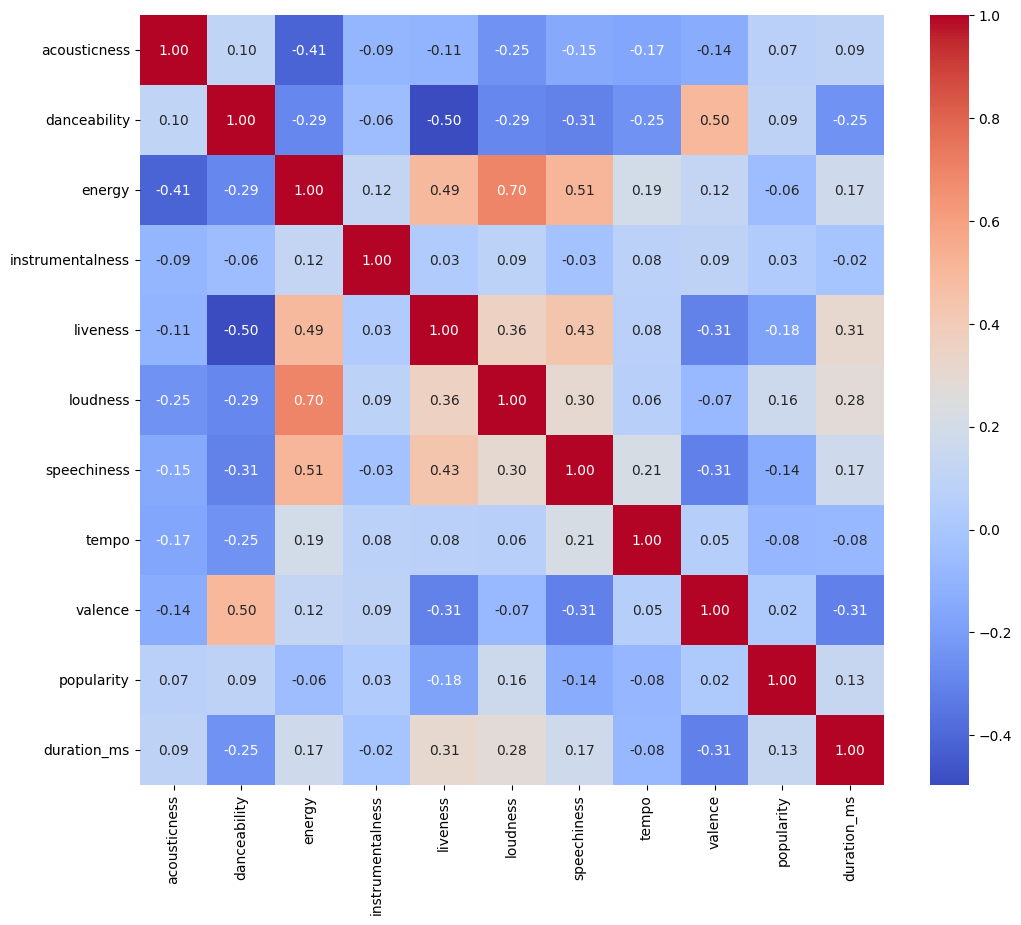

In [32]:
##Lets draw a heat map for better understanding
plt.figure(figsize = (12,10))

sns.heatmap(data_songs_for_corr.corr(numeric_only = True), annot = True, fmt = '0.2f',  cmap = 'coolwarm')

### From the above heat-map
1. Strong Positive Correlations

##### *Energy ↔ Loudness (0.70)*
##### *Energy ↔ Speechiness (0.51)*
##### *Energy ↔ Liveness (0.49)*
##### *Danceability ↔ Valence (0.50)*

2. Strong Negative Correlations
##### *Danceability ↔ Liveness (–0.50)*
##### *Energy ↔ Acousticness (–0.41)*

3. Popularity vs. Features

##### Popularity has only weak correlations with all features.

##### Highest is with liveness (0.16) and loudness (0.16).

Others are close to zero.

This suggests popularity doesn’t depend much on audio features alone — external factors (historical influence, fan base, cultural trends) may matter more.

### Question 3-d
#### Provide insights on the significance of dimensionality reduction techniques. Share your ideas and elucidate your observations


Dimensionality Reduction for Music Data
Why Reduce Dimensions?
High-dimensional datasets (like Spotify features) suffer from redundancy, noise, visualization challenges, and the "curse of dimensionality" that hurts clustering performance.
PCA Application
PCA creates uncorrelated principal components from original features:

PC1 might capture energy/loudness vs. acousticness contrast
PC2 might represent danceability/valence ("positivity")
Reduces 10+ features to 2-3 interpretable dimensions

Key Benefits

Makes clusters more distinct and meaningful
Enables 2D visualization of song groups
Reveals hidden musical structure (not just computational efficiency)
Shows Rolling Stones catalog spans few core musical themes

Bottom Line
PCA transforms correlated audio features into fewer meaningful dimensions, improving clustering and revealing that songs naturally group into musically cohesive themes - similar to how streaming platforms compress hundreds of audio characteristics into latent "music style" dimensions for recommendations.

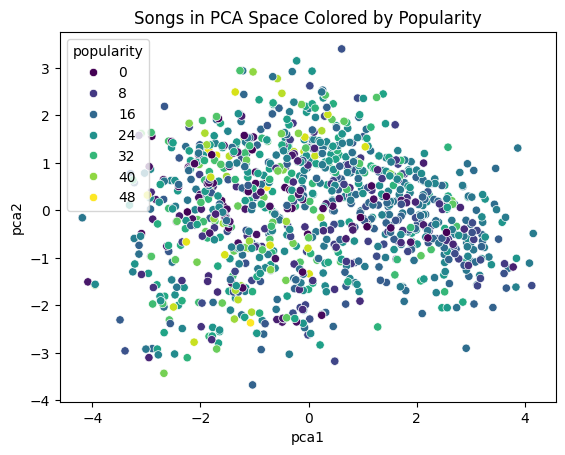

In [54]:
 ## Dimensionality reduction using PCA (Principal component analysis)
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
            'loudness', 'speechiness', 'tempo', 'valence']

# Standardization of the features
X = data_songs[features]
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

data_songs['pca1'] = X_pca[:,0]
data_songs['pca2'] = X_pca[:,1]

sns.scatterplot(x='pca1', y='pca2', hue='popularity', data=data_songs, palette='viridis')
plt.title("Songs in PCA Space Colored by Popularity")
plt.show()


## Question 4
##### Perform cluster analysis
##### a.Identify the right number of clusters
##### b.Use appropriate clustering algorithms
##### c.Define each cluster based on the features

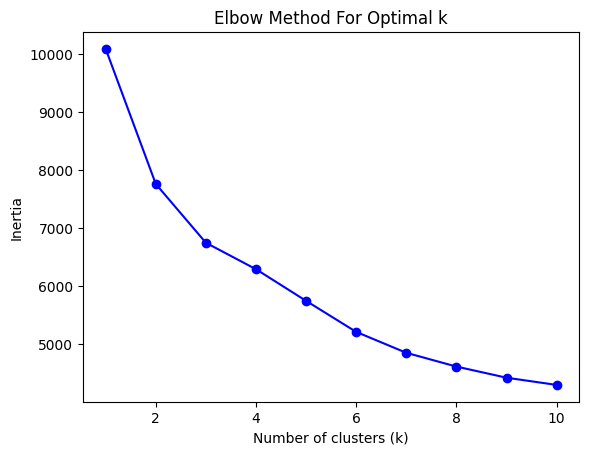

In [44]:
## Determining the correct number of clusters using the elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

The inertia (within-cluster sum of squares) drops steeply from k=1 → k=3.

After k=3, the reduction becomes more gradual, and the curve starts to flatten.

This “bend” or elbow point is usually considered the optimal k.

Hence k = 3, are the optimal number of clusters 

In [46]:
optimal_k = 3 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

data_songs['cluster'] = clusters

In [48]:
# View cluster centers
centers = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print("Cluster centers:\n", centers)

# Or see average features by cluster
cluster_summary = data_songs.groupby('cluster')[features + ['popularity']].mean()
print("Cluster summary:\n", cluster_summary)

Cluster centers:
    acousticness  danceability    energy  instrumentalness  liveness  loudness  \
0      0.930338     -0.002357 -1.152380         -0.292814 -0.414570 -0.670527   
1     -0.312961      0.648656  0.013994          0.216656 -0.604801 -0.169844   
2     -0.331063     -0.700473  0.814566         -0.023704  0.953187  0.666635   

   speechiness     tempo   valence  
0    -0.541481 -0.465477 -0.673565  
1    -0.396350  0.010800  0.850552  
2     0.818916  0.323452 -0.435755  
Cluster summary:
          acousticness  danceability    energy  instrumentalness  liveness  \
cluster                                                                     
0            0.438996      0.480660  0.575010          0.021316  0.331141   
1            0.169794      0.570457  0.782393          0.066286  0.265444   
2            0.165874      0.384365  0.924735          0.045070  0.803508   

         loudness  speechiness       tempo   valence  popularity  
cluster                               

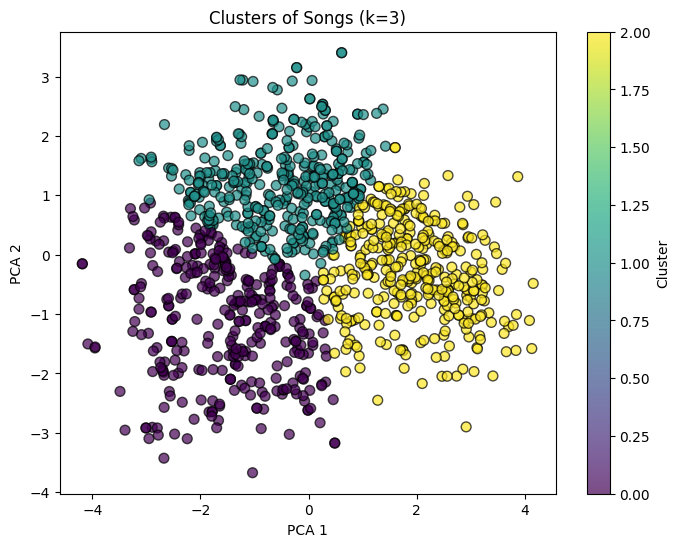

In [49]:
kmeans = KMeans(n_clusters=3, random_state=42)
data_songs['cluster'] = kmeans.fit_predict(data_songs[['pca1', 'pca2']])

# --- Scatter plot of clusters ---
plt.figure(figsize=(8,6))
scatter = plt.scatter(data_songs['pca1'], data_songs['pca2'], 
                      c=data_songs['cluster'], cmap='viridis', 
                      s=50, alpha=0.7, edgecolors='k')

plt.title("Clusters of Songs (k=3)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, label="Cluster")
plt.show()

In [52]:
# Group songs by cluster and calculate average feature values
cluster_summary = data_songs.groupby('cluster')[['acousticness', 'danceability', 'energy', 
                                         'instrumentalness', 'liveness', 'loudness', 
                                         'speechiness', 'tempo', 'valence', 'popularity']].mean()

print(cluster_summary)

         acousticness  danceability    energy  instrumentalness  liveness  \
cluster                                                                     
0            0.408753      0.502864  0.582052          0.020400  0.310680   
1            0.156319      0.559403  0.815547          0.070862  0.293298   
2            0.166306      0.376174  0.925021          0.046445  0.821201   

         loudness  speechiness       tempo   valence  popularity  
cluster                                                           
0       -9.138017     0.043500  111.744058  0.493919   20.693642  
1       -6.772363     0.048894  124.560886  0.782326   21.196517  
2       -5.186437     0.087053  131.765507  0.475605   17.571046  


1. Cluster 0 (Purple):
   High acousticness, Low loudness, 
2. Cluster 1 (Teal):
   High Danceability, high instrumentalness, High Valence, Highly Popular
3. Cluster 2 (Yellow):
   High Energy, High liveness, High speechiness, High tempo